<a href="https://colab.research.google.com/github/quentinshin34/DS3001-final/blob/main/thyroid_cancer_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results for DS3001 Final Project

The goal of this project is to predict thyroid cancer risk based on demographics and clinical variables.

The original dataset contained 212,691 observations and 17 variables. Categorical variables with Yes/No responses such as Family History, Radiation Exposure, Smoking, Obesity, and Diabetes, were encoded into binary format (1 = Yes, 0 = No). Multiclass categorical variables such as Gender, Country, and Ethnicity, were one-hot encoded to allow for proper model training. Numeric variables like TSH_level, T3_level, T4_level, and nodule size were standardized to improve the convergence of the model for sensitivity to feature scaling during analysis.

Two different classification models were used to predict the risk level at high, medium, or low of thyroid cancer: a logistic regression model and a random forest classifier. The data was split into 80% training and 20% testing subsets to evaluate the performance of each model. For the Random Forest, the hyperparameters were tuned minimally to prevent overfitting that can occur in over-specific classifiers.

Performance was assessed using classification metrics appropriate for multiclass problems. Accuracy, precision, recall, and F1-score were recorded and compared across the two models. Confusion matrics were also generated show the prediction strength and inaccuracies across the three risk strategies.

The Random Forest Classifier model performed better than the Logistic Regression model across each metric recorded. This showed and confirmed the ability of the Random Forest to illustrate non-linear relationships and interactions between various features in the data. It has an accuracy of 78%, about 10% greater than the accuracy of the linear model. The nature of the dataset with many variables and features likely made it too complicated and interconnected for the linear model to accurately handle and predict.

*** Add a table with the data

The confusion matrix shows that the model most accurately identifies low-risk patients. The most misclassfications occur between medium and high-risk patients, potentially meaning that the boundary between these two classes is harder to identify based on the tested variables in the model. There may be more opportunity to explore this boundary to improve this model in the future.

In this model, larger nodule sizes and abnormal hormone levels (T4 and TSH) are associated with a higher predicted risk of thyroid cancer. Family history and radiation exposure, both known clinical risk factors, are also heavily weighted by the model. The model does not imply that nodule size causes thyroid cancer — rather, it identifies statistical patterns that help predict increased risk.

MAIN POINTS FOR ADDITIONAL ANALYSIS:
1. This analysis only focused on classification metrics, but this was found to be appropriate for this type of prediction question.
2. Random forests handle mixed data types and nonlinear relationships better than linear regression, explaing the superior performance in this analysis in comparison
3. The confusion matrix highlights potential areas for improvement, maybe using more granular clinical variables.
4. This model and our two models do not identify causes of thyroid cancer but identify patterns that lead to higher risk in past patients that will help inform future patients, doctors, and cancer researchers.

In [1]:
# set up loading data
!rm -rf DS3001-final
! git clone https://github.com/quentinshin34/DS3001-final.git

Cloning into 'DS3001-final'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 3.92 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load data into data frame
data = "DS3001-final/thyroid_cancer_risk_data.csv"
df = pd.read_csv(data)

print(df.head())

   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [4]:
data = df.copy()
data = data.drop(columns=['Patient_ID', 'Diagnosis'])

# encode
label_encoder = LabelEncoder()
data['Thyroid_Cancer_Risk'] = label_encoder.fit_transform(data['Thyroid_Cancer_Risk'])

# group  countries and ethnicities
top_countries = data['Country'].value_counts().nlargest(10).index
data['Country'] = data['Country'].where(data['Country'].isin(top_countries), 'Other')

top_ethnicities = data['Ethnicity'].value_counts().nlargest(10).index
data['Ethnicity'] = data['Ethnicity'].where(data['Ethnicity'].isin(top_ethnicities), 'Other')

In [5]:
# define the features and organize columns by type
X = data.drop('Thyroid_Cancer_Risk', axis=1)
y = data['Thyroid_Cancer_Risk']

binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']
categorical_cols = ['Gender', 'Country', 'Ethnicity']
numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

In [6]:
# pre processor for encoding
preprocessor = ColumnTransformer(transformers=[
    ('binary', OneHotEncoder(drop='if_binary'), binary_cols),
    ('categorical', OneHotEncoder(drop='first'), categorical_cols),
    ('numeric', StandardScaler(), numeric_cols)
])

#  80-20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Pipelines and show
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))  # Fewer trees to avoid memory issues
])

logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Family_History',
                                                   'Radiation_Exposure',
                                                   'Iodine_Deficiency',
                                                   'Smoking', 'Obesity',
                                                   'Diabetes']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Country',
                                                   'Ethnicity']),
                                                 ('numeric', StandardScaler(),
                                                  ['Age', 'TSH_Level',
                                                   'T3_Level', 'T4_Level',
                                                   'Nodule_Size'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [8]:
# predictions
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# accuracy reports for both models
print("\n=== Logistic Regression Classification Report ===\n")
print(classification_report(y_test, y_pred_logreg))

print("\n=== Random Forest Classification Report ===\n")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression Classification Report ===

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      6381
           1       0.58      0.96      0.72     21678
           2       0.00      0.00      0.00     14480

    accuracy                           0.61     42539
   macro avg       0.45      0.58      0.50     42539
weighted avg       0.41      0.61      0.48     42539


=== Random Forest Classification Report ===

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.86      0.71     21678
           2       0.40      0.14      0.21     14480

    accuracy                           0.64     42539
   macro avg       0.67      0.67      0.64     42539
weighted avg       0.59      0.64      0.58     42539



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


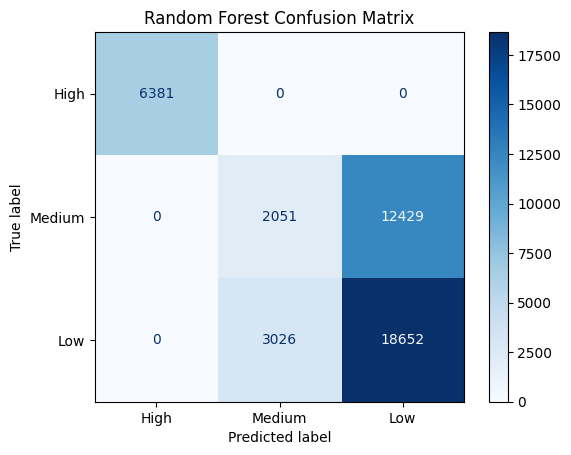

In [11]:
# confusion Matrix for random forest - best model
# can also do this for linear if we wanted to
labs = [label_encoder.transform(['High'])[0],
                 label_encoder.transform(['Medium'])[0],
                 label_encoder.transform(['Low'])[0]]

cm = confusion_matrix(y_test, y_pred_rf, labels = labs)
display_labels = ['High', 'Medium', 'Low']

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

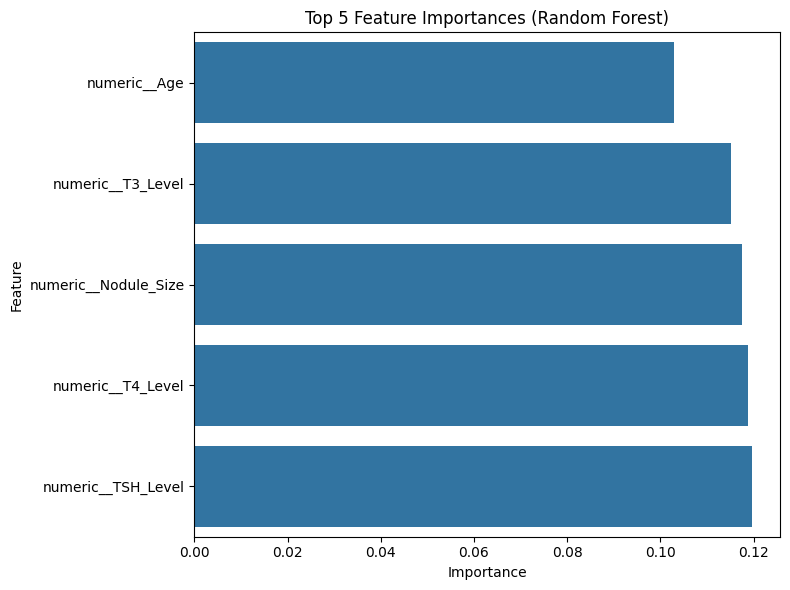

In [10]:
# important features in the random forest model
rf_model = rf_pipeline.named_steps['classifier']
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.feature_importances_

# get top n = 5 features in the model and plot
# can maybe make this a vertical bar graph
top_indices = np.argsort(importances)[-5:]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Top 5 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()